# 6.6 Sourcing and Analyzing Time Series Data
## This script contains the following:
### 01. Importing Libraries and Data
### 02. Subsetting, Wrangling, and Cleaning Time Series Data
### 03. Time Series Analysis: Decomposition
### 04. Testing for Stationarity
### 05. Stationarizing Data

### 01. Importing Libraries and Data

In [6]:
# Importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import os

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [7]:
# Creating path variable
path = path = r'C:\Users\widne\Documents\CareerFoundry Exercises\Data_Immersion\Achievement 6\06-2024 International Football Matches'

In [8]:
# Importing data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'results_cleaned.pkl'))

In [9]:
# Checking dataframe
df.shape

(47075, 16)

In [10]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_goals,goal_diff,scoring_type,winning_team,losing_team
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,United Kindgom,False,1872,11,0.0,0.0,Low scoring,draw,draw
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,United Kingdom,False,1873,3,6.0,2.0,High scoring,England,Scotland
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,United Kindgom,False,1874,3,3.0,1.0,Medium scoring,Scotland,England
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,United Kingdom,False,1875,3,4.0,0.0,Medium scoring,draw,draw
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,United Kindgom,False,1876,3,3.0,3.0,Medium scoring,Scotland,England


### 02. Subsetting, Wrangling, and Cleaning Time Series Data

I want to look at if and how the scoring in interational soccer has changed throughout the years. To do this I will create a dataframe that contains the year and the average combined goals scored in matches.

In [11]:
# Creating data frame that aggregates the average of total goals scored in each match, grouped by year.
data_2 = df.groupby('year', as_index=False)[['total_goals']].agg('mean')

In [12]:
data_2.head()

,year,total_goals
0,1872,0.0
1,1873,6.0
2,1874,3.0
3,1875,4.0
4,1876,3.5


In [28]:
# Creating data frame that aggregates the average goal difference for each match grouped by year.
data_3 = df.groupby('year', as_index=False)[['goal_diff']].agg('mean')

In [29]:
data_3.head()

,year,goal_diff
0,1872,0.0
1,1873,2.0
2,1874,1.0
3,1875,0.0
4,1876,3.5


In [13]:
# Creating a datetime column from 'year', setting it as the index, and dropping the 'year' column
from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['year'], format='%Y')
data_2 = data_2.set_index('datetime')
data_2.drop(['year'], axis=1, inplace=True)
data_2.head()

,total_goals
datetime,
1872-01-01,0.0
1873-01-01,6.0
1874-01-01,3.0
1875-01-01,4.0
1876-01-01,3.5


In [30]:
data_3['datetime'] = pd.to_datetime(data_3['year'], format='%Y')
data_3 = data_3.set_index('datetime')
data_3.drop(['year'], axis=1, inplace=True)
data_3.head()

,goal_diff
datetime,
1872-01-01,0.0
1873-01-01,2.0
1874-01-01,1.0
1875-01-01,0.0
1876-01-01,3.5


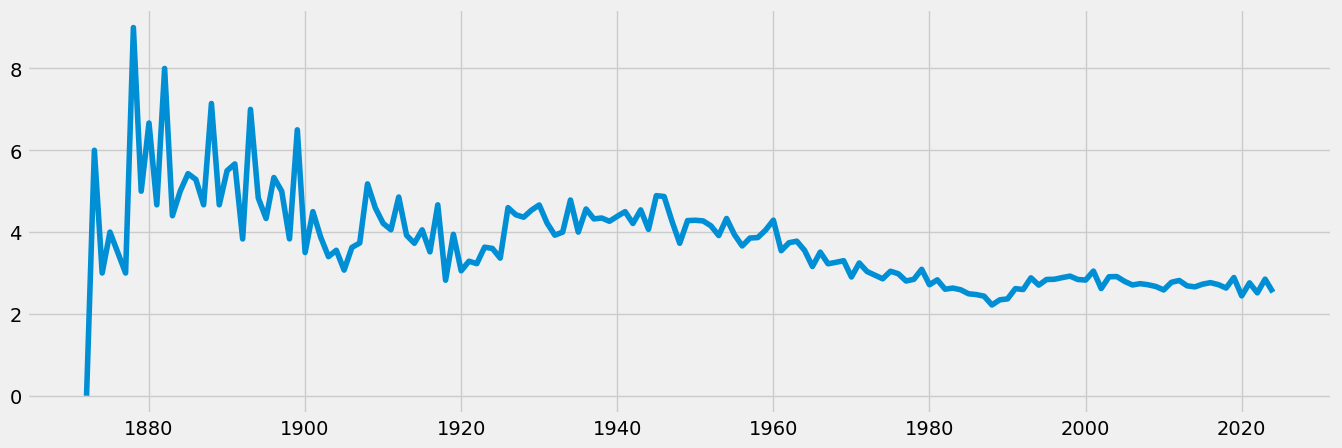

In [14]:
# Plotting dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_2)

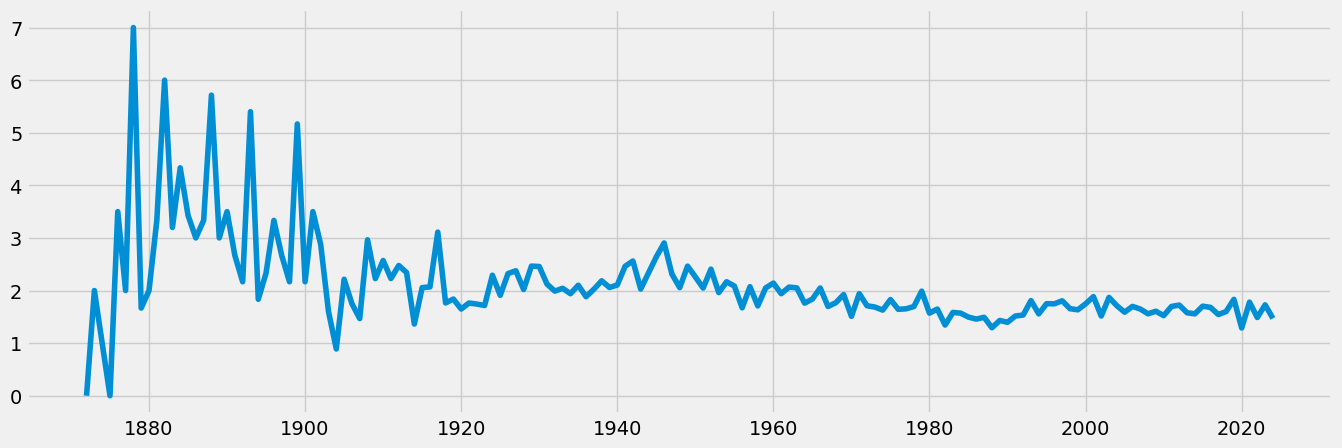

In [31]:
# Plotting dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_3)

Before the 1900s the scoring was high with the average total goals scored being greater than 4. However, as time has gone on the average goals scored in a match has decreased and sabilized to about 3 per match.

### 03. Time Series Analysis: Decomposition

In [32]:
# Decomposing time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_2, model='additive')

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

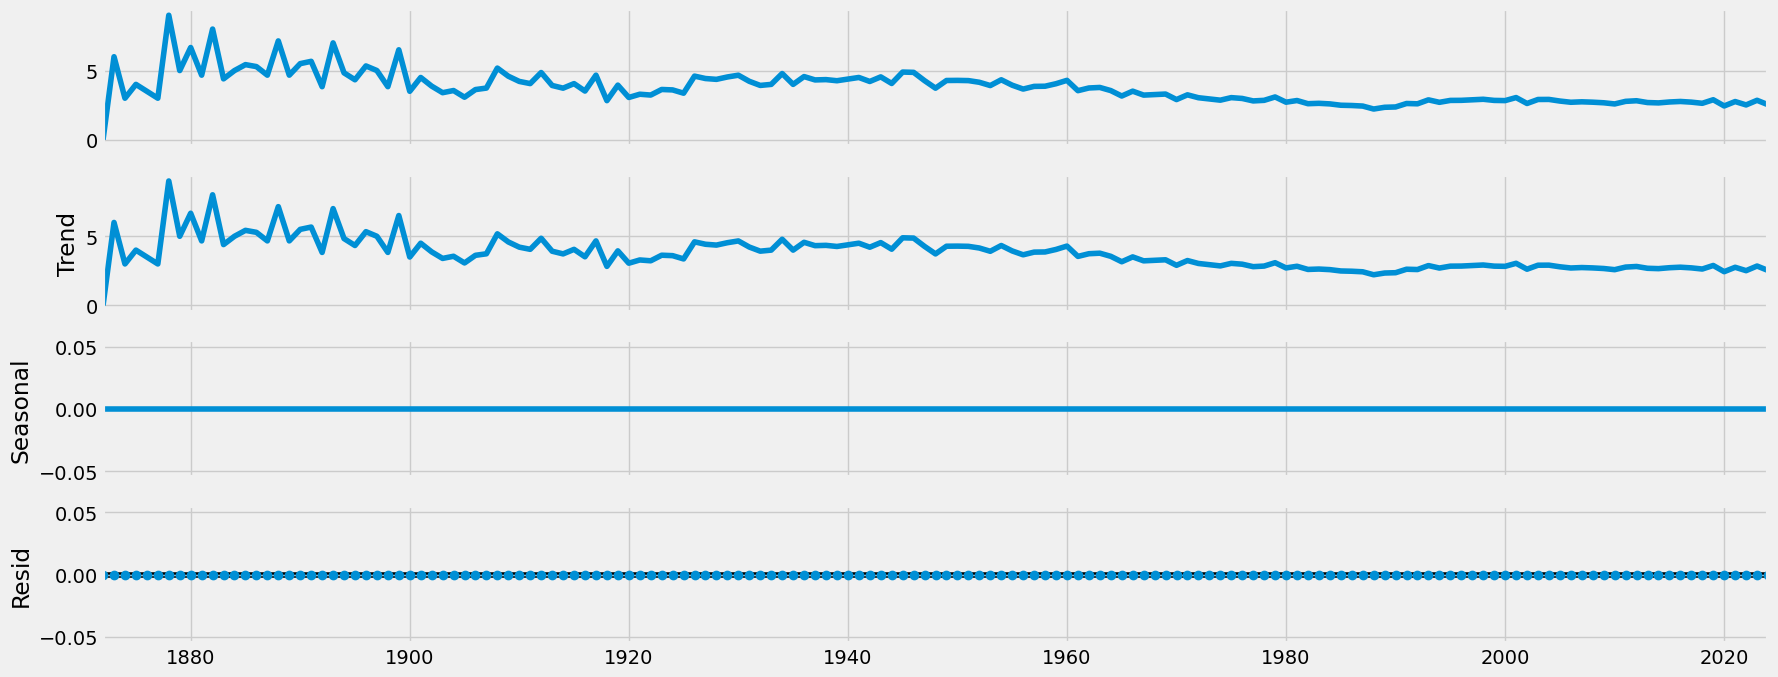

In [34]:
# Plotting the separate components
decomposition.plot()
plt.show()

The decomposition shows that the trend for goal scoring in international matches was volitile at the beginning, but has since nomalized to a consistent number. Since this data has been aggregated by year, there is no seasonality to this data and there is also no unexplained noise.

In [36]:
# Decomposing time series using an additive model
decomposition_2 = sm.tsa.seasonal_decompose(data_3, model='additive')

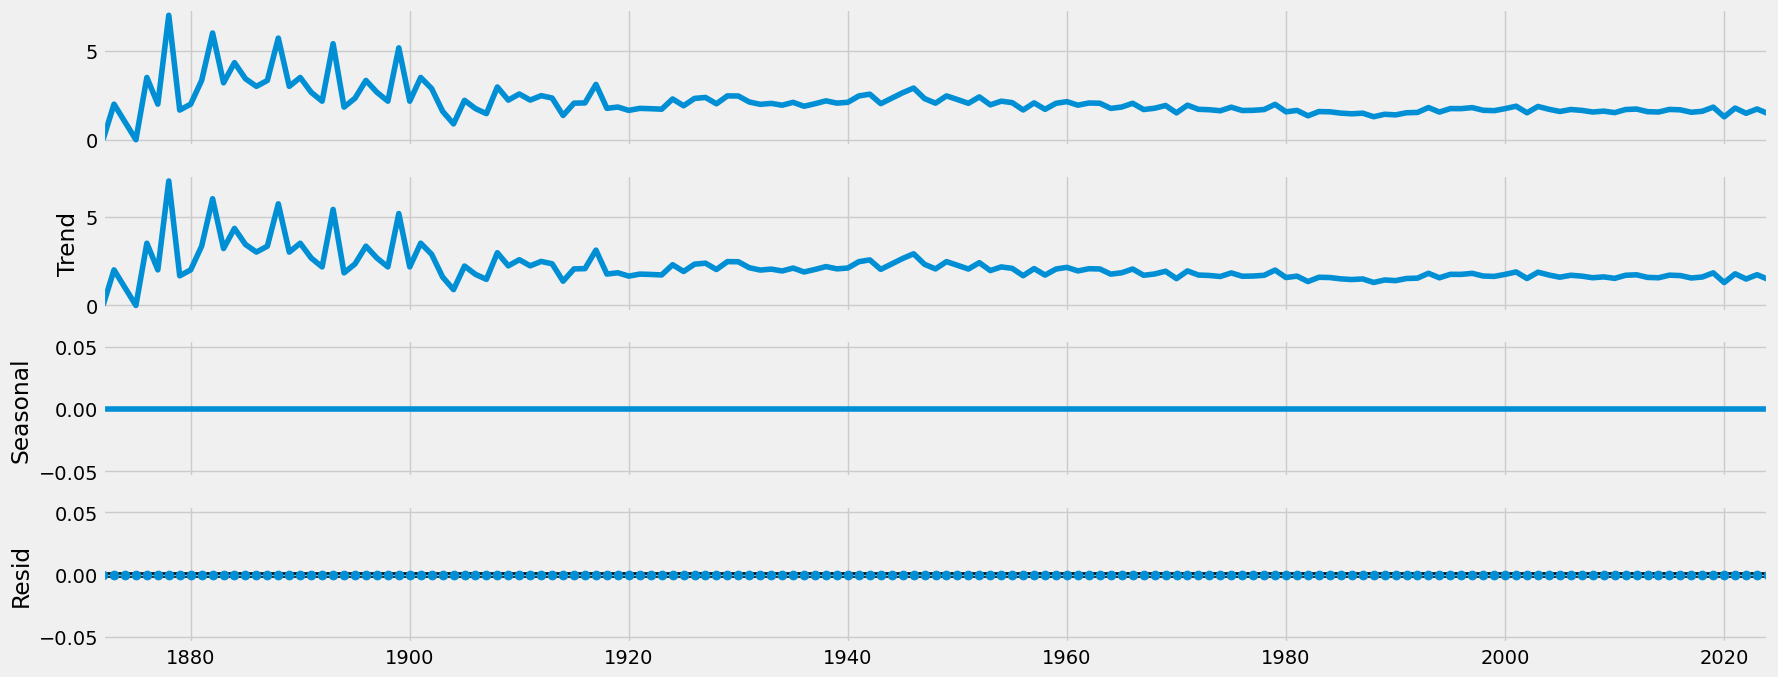

In [37]:
# Plotting the separate components
decomposition_2.plot()
plt.show()

### 04. Testing for Stationarity

In [18]:
# Creating function to print out the correct output from the array of numbers the adfuller() function
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print('Dickey_Fuller Stationary test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)
        
dickey_fuller(data_2['total_goals'])

Dickey_Fuller Stationary test:
Test Statistic                  -1.300600
p-value                          0.628898
Number of Lags Used             14.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


From the Dickey_Fuller test the test statistic is -1.3 with a p-value of 0.62. Since the p-value is greater than 0.05, this test result is not significant. Also, the 5% critical value of -2.88 is less than the test statistic which means we cannot reject the null hypothesis. Overall, the test shows that the data is non-stationary.

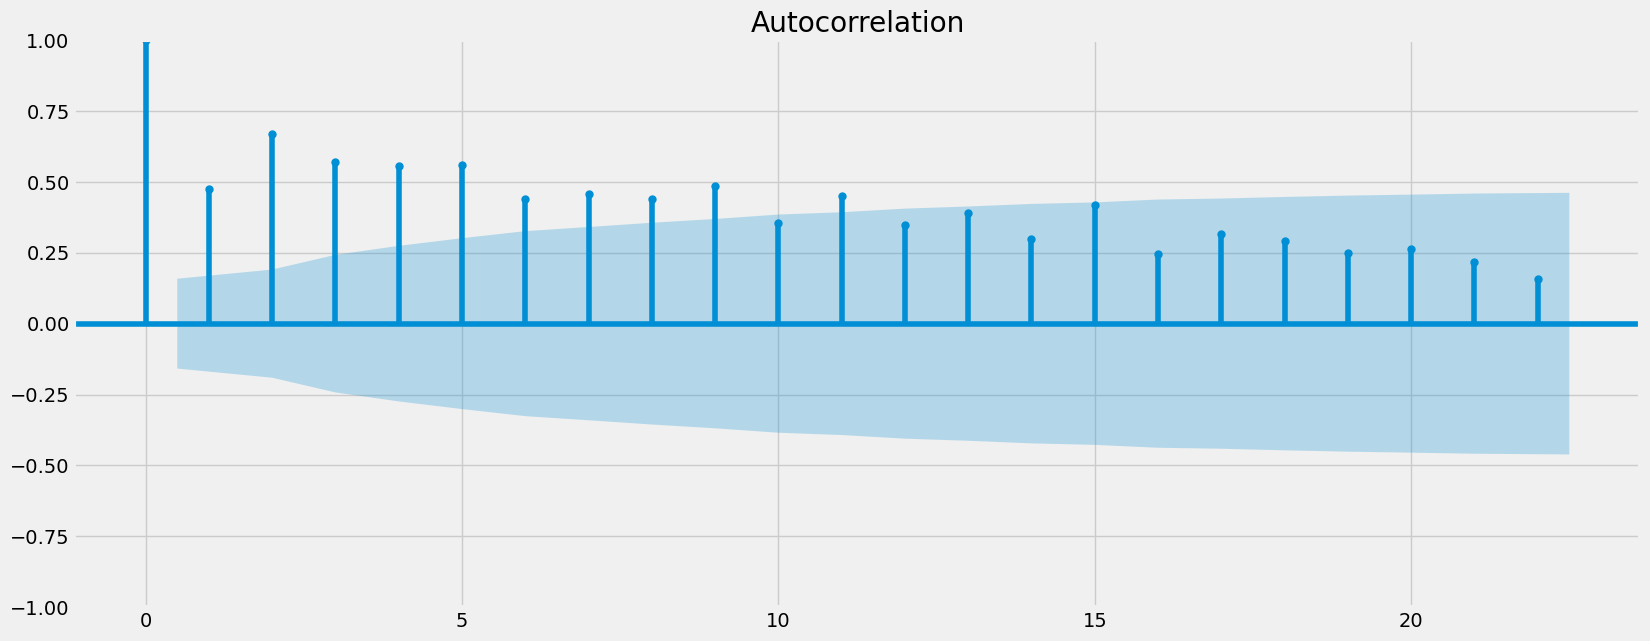

In [19]:
# Plotting for autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_2)
plt.show()

### 05. Stationarizing Data

In [20]:
# Chaning observation to t-1, making the whole thing t-(t-1)
data_diff = data_2 - data_2.shift(1)

In [21]:
# Removing missing values as a result of differencing
data_diff.dropna(inplace=True)

In [22]:
data_diff.head()

,total_goals
datetime,
1873-01-01,6.0
1874-01-01,-3.0
1875-01-01,1.0
1876-01-01,-0.5
1877-01-01,-0.5


In [23]:
data_diff.columns

Index(['total_goals'], dtype='object')

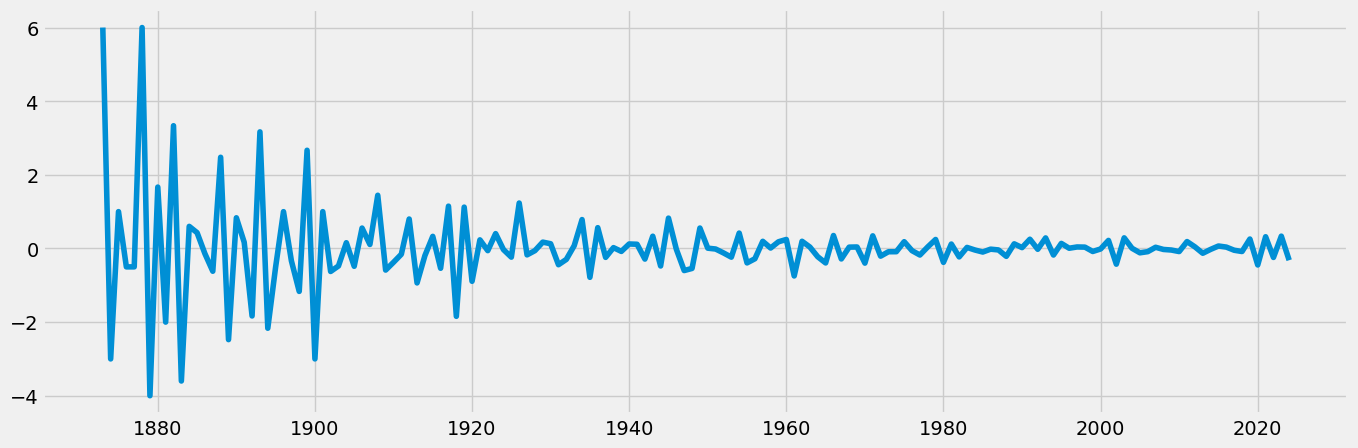

In [24]:
# Plotting data after differencing
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [25]:
# Running Dickey-Fuller test on differenced data
dickey_fuller(data_diff)

Dickey_Fuller Stationary test:
Test Statistic                  -4.079038
p-value                          0.001049
Number of Lags Used             14.000000
Number of Observations Used    137.000000
Critical Value (1%)             -3.479007
Critical Value (5%)             -2.882878
Critical Value (10%)            -2.578149
dtype: float64


After one round of differencing our p-value of 0.001 is less than 0.05, and our 5% critical value of -2.88 is greater than our test statistic of -4.08. This means we can now reject the null hypothesis and have successfully made our data stationary.

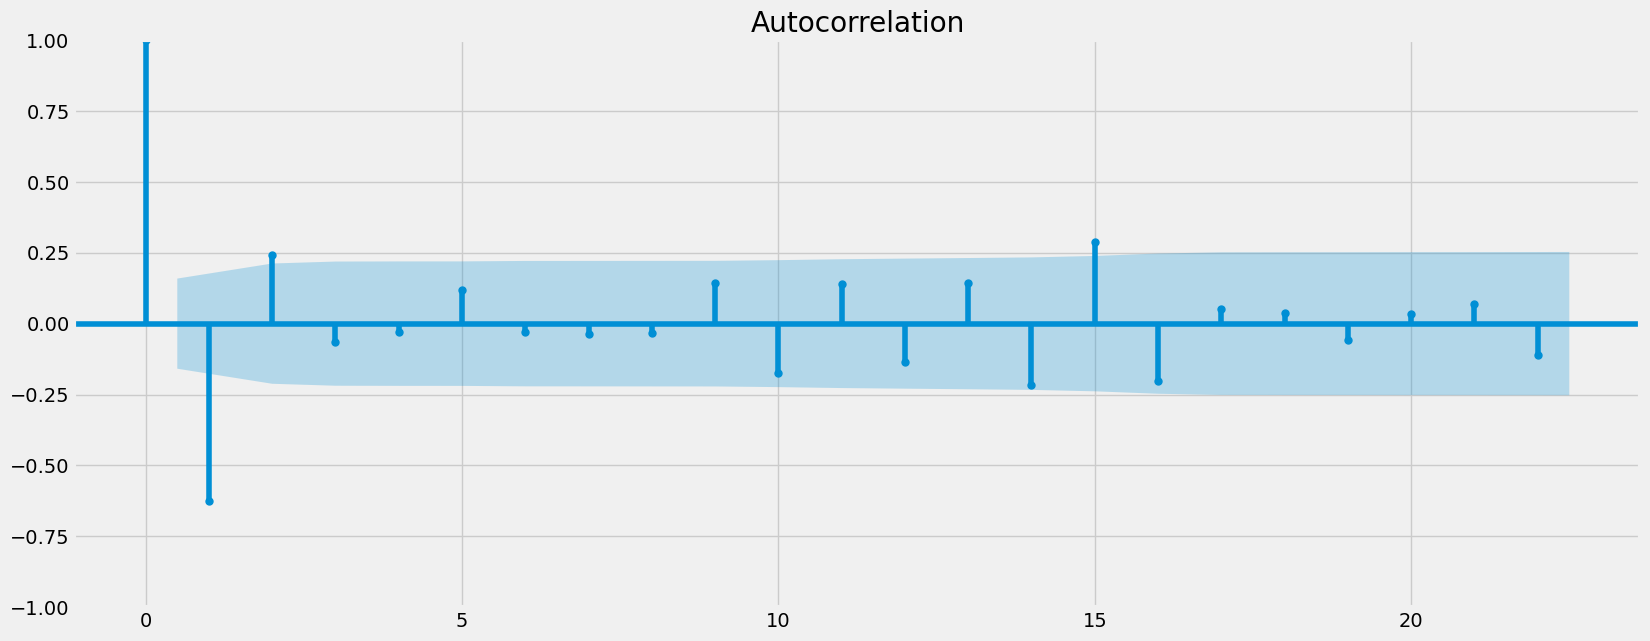

In [26]:
# Plotting autocorrelation
plot_acf(data_diff)
plt.show()